In [12]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [13]:
paths = ['1_day_-2', '1_day_-1', '1_day_0',
         '3_day_0',  '3_day_1',  '3_day_2',
         '4_day_1',  '4_day_2',  '4_day_3']

def get_data(path, price_data = False):
    if price_data:
        return pd.read_csv(f'../prices/prices_round_{path}.csv', sep=';', header=0)
    return pd.read_csv(f'../prices/trades_round_5/trades_round_{path}_wn.csv', sep=';', header=0)

In [14]:
def calculate_specific_profits(trades, prices, trader, product):
    last_price = prices[(prices['timestamp'] == prices['timestamp'].max()) & (prices['product'] == product)]['mid_price'].values[0]

    df = trades[(trades['buyer'] == trader) & (trades['symbol'] == product)]
    profit = (df['price'] * df['quantity']).sum()
    position = df['quantity'].sum()
    
    df = trades[(trades['seller'] == trader) & (trades['symbol'] == product)]
    profit -= (df['price'] * df['quantity']).sum()
    position -= df['quantity'].sum()

    return profit - position * last_price

In [15]:
vipers = ['Valentina', 'Vinnie', 'Vladimir', 'Vivian']
cobras = ['Celeste', 'Colin', 'Carlos', 'Camilla']
pythons = ['Pablo', 'Penelope', 'Percy', 'Petunia']
rattlesnakes = ['Ruby', 'Remy', 'Rihanna', 'Raj']
anacondas = ['Amelia', 'Adam', 'Alina', 'Amir']
traders = vipers + cobras + pythons + rattlesnakes + anacondas

products = ['AMETHYSTS', 'STARFRUIT', 'ORCHIDS', 'CHOCOLATE', 'ROSES', 'STRAWBERRIES', 'GIFT_BASKET', 'COCONUT', 'COCONUT_COUPON']

In [16]:
profits = {product: {trader: 0 for trader in traders} for product in products}
for path in paths:
    trades = get_data(path)
    prices = get_data(path, price_data=True)

    unique_traders = trades['buyer'].unique()
    unique_products = trades['symbol'].unique()
    for trader in traders:
        if trader not in unique_traders:
            continue
        for product in products:
            if product not in unique_products:
                continue
            profits[product][trader] += calculate_specific_profits(trades, prices, trader, product)

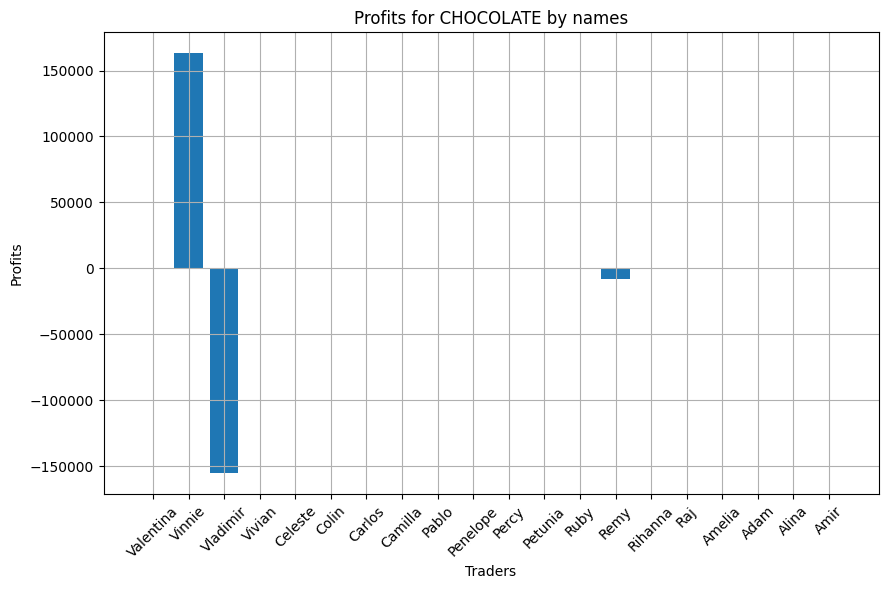

In [27]:
visualizing_product = 'CHOCOLATE'

plt.figure(figsize=(10, 6))
plt.bar(traders, list(profits[visualizing_product].values()))
plt.xticks(rotation=45)
plt.grid()
plt.ylabel('Profits')
plt.xlabel('Traders')
plt.title(f'Profits for {visualizing_product} by names')
plt.show()
